In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import sklearn.cluster as cluster
from sklearn.cluster import KMeans
%matplotlib inline
from scipy.stats import linregress
import plotly.graph_objects as go
from tabulate import tabulate

In [ ]:
# Reading our data set
#df = pd.read_csv('/content/Online Retail.csv')

In [3]:
df = pd.read_excel('/content/Online Retail.xlsx')

In [4]:
#checking the structure and some basic characteristics of my data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


The .info() fuction is use to find
The number of rows and columns in the DataFrame.
The data type of each column (e.g., int64, float64, object).
The number of non-null values in each column.

In [5]:
#Checking to get a quick summary of the key statistical properties of my numerical data.
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


The .describe is used to help you quickly get a summary of those numbers. It would tell you things like:

Count: How many numbers are there in total?
Mean: What's the average of those numbers?
Standard Deviation (std): How spread out are the numbers from the average?
Minimum (min): What's the smallest number?
25%, 50%, 75% (percentiles): These show the range where most of the numbers fall.
Maximum (max): What's the largest number?
Why is this useful?

Quick Overview: You get a sense of the data's characteristics without looking at every single number.
Data Understanding: It helps you identify potential issues like outliers (extremely high or low values).
Data Preparation: It can inform decisions about cleaning or transforming your data for analysis.

In [6]:
# Checking the number of rows and columns present in my dataset
df.shape

(541909, 8)

Imagine your data is arranged in a grid.The  df.shape tells you the height and width of that grid:

The first number in the result represents the number of rows (how many data points you have).
The second number represents the number of columns (how many features or variables each data point has).
Example:

If df.shape returns (541909, 8), it means your DataFrame df has:

541909 rows
8 columns

In [7]:
## Checking the number of rows present in my dataset
df.shape[0]

541909

In [8]:
# # Checking the number  columns present in my dataset
df.shape[1]

8

In [9]:
# Checking for missing values in my data
df.isna()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
541904,False,False,False,False,False,False,False,False
541905,False,False,False,False,False,False,False,False
541906,False,False,False,False,False,False,False,False
541907,False,False,False,False,False,False,False,False


In [10]:
# Checking for the count of  missing values in my data
df.isna().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


Some columns have huge missing values as a result i chose to drop them from my data set

In [11]:
# drop the rows with missing values in description column
df.dropna(subset=['Description'], inplace=True)

In [12]:
# drop the rows with missing values in customer ID
df.dropna(subset=['CustomerID'], inplace=True)

In [13]:
# Checking if the rows with the missing values has been dropped
df.isna().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [14]:
# checking if description and customer id has been dropped
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [15]:
# Checking for duplicates
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
541904,False
541905,False
541906,False
541907,False


In [16]:
# Delete the duplicates
df.drop_duplicates(inplace=True)

In [17]:
#Checking for the count or number  of duplicates
df.duplicated().sum()

np.int64(0)

In [18]:
# Checking the number of dat left after dropping duplicates
df.shape

(401604, 8)

In [19]:
#Checking for the number of distinct or unique values in each column.
df.nunique()

,0
InvoiceNo,22190
StockCode,3684
Description,3896
Quantity,436
InvoiceDate,20460
UnitPrice,620
CustomerID,4372
Country,37


In [20]:
# Checking the names of the countries
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Saudi Arabia', 'Czech Republic', 'Canada',
       'Unspecified', 'Brazil', 'USA', 'European Community', 'Bahrain',
       'Malta', 'RSA'], dtype=object)

In [21]:
df['Country'].nunique()

37

In [22]:
# Output the categorical type
df.select_dtypes(include='object')


,InvoiceNo,StockCode,Description,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
1,536365,71053,WHITE METAL LANTERN,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,United Kingdom
...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,France


While 'InvoiceNo' might appear to be numerical, it's crucial to consider its nature and how it's used within the dataset. Based on the code provided and common practices in retail data analysis, 'InvoiceNo' is likely a categorical variable, even if it contains numbers.

Here's the reasoning:

Unique Identifier: 'InvoiceNo' is likely used as a unique identifier for each transaction or order. Each invoice would have a distinct InvoiceNo, even if those numbers are sequential.

Not for Numerical Calculations: You wouldn't perform mathematical calculations on 'InvoiceNo' like you would with numerical variables (e.g., quantity, price). It doesn't make sense to find the average or sum of invoice numbers.

Representing Groups: 'InvoiceNo' acts more as a label or category to group items within the same transaction. All items belonging to the same invoice would share the same 'InvoiceNo'.

Data Type: While the provided code doesn't explicitly reveal the data type of 'InvoiceNo', if it's stored as an 'object' in the Pandas DataFrame (as revealed by df.select_dtypes(include='object')), it further suggests its categorical nature.

In [23]:
# Output quantity and invoice rows
df[['Quantity','InvoiceDate']]


,Quantity,InvoiceDate
0,6,2010-12-01 08:26:00
1,6,2010-12-01 08:26:00
2,8,2010-12-01 08:26:00
3,6,2010-12-01 08:26:00
4,6,2010-12-01 08:26:00
...,...,...
541904,12,2011-12-09 12:50:00
541905,6,2011-12-09 12:50:00
541906,4,2011-12-09 12:50:00
541907,4,2011-12-09 12:50:00


In [24]:
# Outputting transactions that start with C
df[df['InvoiceNo'].str.startswith('C', na=False)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [25]:
# Outputting transactions that start with C
df[df['InvoiceNo'].str.startswith('C', na=False)].shape

(8872, 8)

In [26]:
# Assign a variable to the Cancelled transaction named C
C = df[df['InvoiceNo'].str.startswith('C', na=False)]

In [27]:
C.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,8872.000000,8872,8872.000000,8872.000000
mean,-30.774910,2011-06-27 09:06:05.024797184,18.899512,14990.152953
min,-80995.000000,2010-12-01 09:41:00,0.010000,12346.000000
25%,-6.000000,2011-03-23 11:23:45,1.450000,13505.000000
50%,-2.000000,2011-07-11 13:51:00,2.950000,14868.000000
75%,-1.000000,2011-10-06 20:36:00,4.950000,16393.000000
max,-1.000000,2011-12-09 11:58:00,38970.000000,18282.000000
std,1172.249902,NaN,445.190864,1708.230387


The output of C.describe() is a new DataFrame containing these calculated statistics for each numerical column in C.

In the context of the provided code:
Recall that C was created to store the rows of the original DataFrame (df) where the 'InvoiceNo' column starts with 'C', representing canceled transactions.
Therefore, C.describe() would be specifically providing descriptive statistics for the numerical columns (like 'Quantity', 'UnitPrice' if they exist in C) related to canceled transactions.

Since C contains data related to canceled transactions, C.describe() would specifically provide these descriptive statistics for the numerical columns associated with canceled transactions. This might include things like the quantity of items in canceled orders or the unit price of those items, if those columns are present in your DataFrame.


In [28]:
# Find the percentage of C
C.shape[0] / df.shape[0] * 100

2.209141343213713

From the entire data about 2.20 percent of the dataset went ito cancelled transactions

In [29]:
# Do a unique function on Stockcode
df['StockCode'].nunique()

3684

In [30]:
# Finding stockcode with highest quantity
df['StockCode'].value_counts().head(1)


,count
StockCode,
85123A,2065


In [31]:
# 1 The name of the product with the highest quantity
df[df['StockCode'] == '85123A'].head(1)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom


In [32]:
# frequency of stockcode 85123A
df[df['StockCode'] == '85123A'].shape[0]

2065

From the stockcode wth the highest quantity i would advice that the company sells more of that product with the highest quantity or invest more money  and also maybe run promotions on them to boost more revenue for the company and make sure they always have some in stock

In [33]:
# Finding the percentage frequency of the first 10 stockcode with highest quantity
top_10_stockcode = df['StockCode'].value_counts(normalize=True).head(10)* 100
top_10_stockcode

,proportion
StockCode,
85123A,0.514188
22423,0.471609
85099B,0.413093
47566,0.350843
84879,0.349847
20725,0.335156
22720,0.304778
POST,0.297806
22197,0.276392


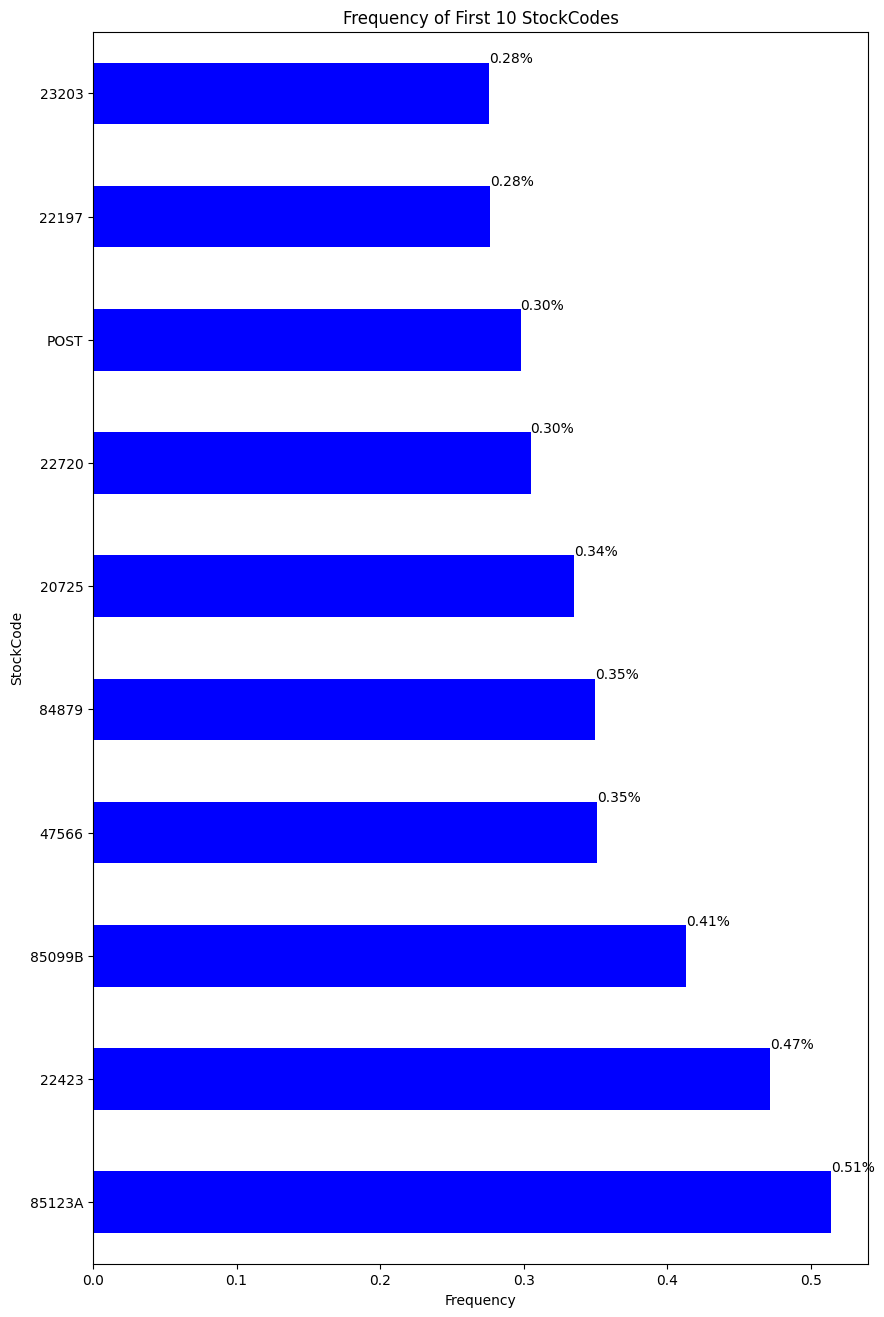

In [34]:
# Finding the percentage frequency of the first 10 stockcode with highest quantity
top_10_stockcode = df['StockCode'].value_counts(normalize=True).head(10)* 100

#Visualization
plt.figure(figsize=(10, 16))
top_10_stockcode.plot(kind='barh', color='blue')
plt.xlabel('Frequency')
plt.ylabel('StockCode')
plt.title('Frequency of First 10 StockCodes')
#plt.gca().invert_yaxis()  # Invert the y-axis to have the most frequent StockCode at the top

#frequencies of the graph
for index, value in enumerate(top_10_stockcode):
    plt.text(value, index+0.25, f'{value:.2f}%', fontsize = 10)
plt.show()

In [35]:
# Finding the top 10 stockcode with the highest values
top_10_stockcode = df.groupby('StockCode')['UnitPrice'].sum().nlargest(10)
top_10_stockcode


,UnitPrice
StockCode,
M,155500.42
POST,45314.68
22423,23539.60
DOT,11906.36
CRUK,7933.43
22655,6930.50
47566,6862.71
C2,6718.00
22847,6143.48


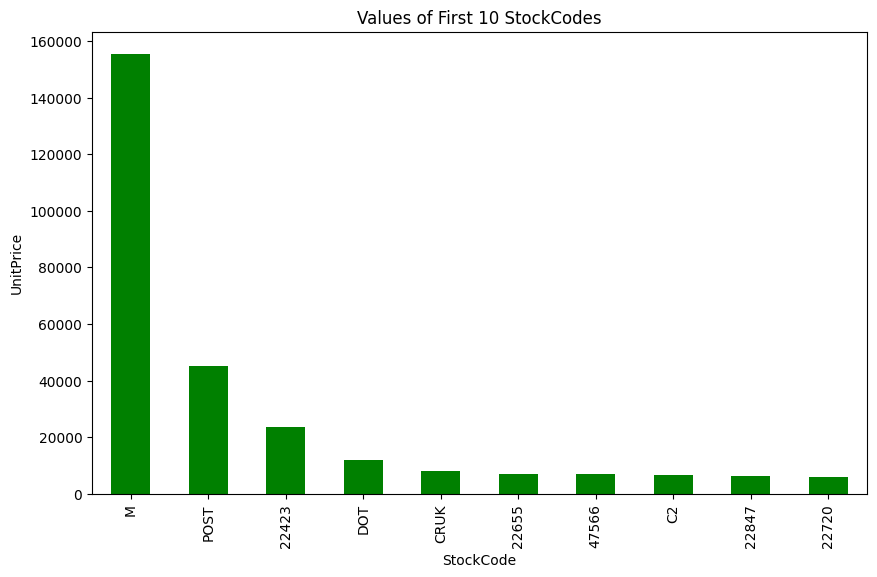

In [36]:
# Finding the value count of the top 10 stockcode with the highest values
top_10_stockcode = df.groupby('StockCode')['UnitPrice'].sum().nlargest(10)

# Visualization
plt.figure(figsize=(10, 6))
top_10_stockcode.plot(kind='bar', color='green')
plt.xlabel('StockCode')
plt.ylabel('UnitPrice')
plt.title('Values of First 10 StockCodes')
#plt.gca().invert_yaxis()
plt.show()

In [37]:
# Outputting unique countries in the data
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Saudi Arabia', 'Czech Republic', 'Canada',
       'Unspecified', 'Brazil', 'USA', 'European Community', 'Bahrain',
       'Malta', 'RSA'], dtype=object)

In [38]:
df['Country'].unique().tolist()

['United Kingdom',
 'France',
 'Australia',
 'Netherlands',
 'Germany',
 'Norway',
 'EIRE',
 'Switzerland',
 'Spain',
 'Poland',
 'Portugal',
 'Italy',
 'Belgium',
 'Lithuania',
 'Japan',
 'Iceland',
 'Channel Islands',
 'Denmark',
 'Cyprus',
 'Sweden',
 'Austria',
 'Israel',
 'Finland',
 'Greece',
 'Singapore',
 'Lebanon',
 'United Arab Emirates',
 'Saudi Arabia',
 'Czech Republic',
 'Canada',
 'Unspecified',
 'Brazil',
 'USA',
 'European Community',
 'Bahrain',
 'Malta',
 'RSA']

In [39]:
df['Country'].nunique()

37

In [40]:
# frequency of the unique country
df['Country'].value_counts()

,count
Country,
United Kingdom,356728
Germany,9480
France,8475
EIRE,7475
Spain,2528
Netherlands,2371
Belgium,2069
Switzerland,1877
Portugal,1471


In [41]:
# Finding the unique stockcode available
df['StockCode'].unique()

array(['85123A', 71053, '84406B', ..., '90214Z', 90089, 23843],
      dtype=object)

In [42]:
# Finding the number of the unique stockcode available
df['StockCode'].nunique()

3684

In [43]:
# Products that countries buy from
df.groupby('Country')['StockCode'].nunique()

,StockCode
Country,
Australia,600
Austria,307
Bahrain,16
Belgium,778
Brazil,32
Canada,147
Channel Islands,430
Cyprus,498
Czech Republic,25


In [44]:
#Find products purchased in the Uk country
df[df['Country'] == 'United Kingdom']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom


In [45]:
#Find products and description  with the highest purchase in the Uk country
df[df['Country'] == 'United Kingdom'].groupby('Description')['Quantity'].sum().nlargest(1)

,Quantity
Description,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,47886


In [46]:
#Find products purchased in the Unspecified country
df[df['Country'] == 'Unspecified']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
152712,549687,20685,DOORMAT RED RETROSPOT,2,2011-04-11 13:29:00,7.95,12363.0,Unspecified
152713,549687,22691,DOORMAT WELCOME SUNRISE,2,2011-04-11 13:29:00,7.95,12363.0,Unspecified
152714,549687,48116,DOORMAT MULTICOLOUR STRIPE,2,2011-04-11 13:29:00,7.95,12363.0,Unspecified
152715,549687,21213,PACK OF 72 SKULL CAKE CASES,24,2011-04-11 13:29:00,0.55,12363.0,Unspecified
152716,549687,21977,PACK OF 60 PINK PAISLEY CAKE CASES,24,2011-04-11 13:29:00,0.55,12363.0,Unspecified
...,...,...,...,...,...,...,...,...
308810,564051,23007,SPACEBOY BABY GIFT SET,1,2011-08-22 13:32:00,16.95,14265.0,Unspecified
308811,564051,21833,CAMOUFLAGE LED TORCH,12,2011-08-22 13:32:00,1.69,14265.0,Unspecified
308812,564051,23081,GREEN METAL BOX ARMY SUPPLIES,2,2011-08-22 13:32:00,8.25,14265.0,Unspecified
308813,564051,23046,PAPER LANTERN 9 POINT DELUXE STAR,2,2011-08-22 13:32:00,6.65,14265.0,Unspecified


In [47]:
#Find products and description  with the highest purchase in the Unspecified country
df[df['Country'] == 'Unspecified'].groupby('Description')['Quantity'].sum().nlargest(1)

,Quantity
Description,
60 CAKE CASES VINTAGE CHRISTMAS,36


In [48]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [49]:
df['Description'].loc[:1000:]

,Description
0,WHITE HANGING HEART T-LIGHT HOLDER
1,WHITE METAL LANTERN
2,CREAM CUPID HEARTS COAT HANGER
3,KNITTED UNION FLAG HOT WATER BOTTLE
4,RED WOOLLY HOTTIE WHITE HEART.
...,...
996,SKULLS SQUARE TISSUE BOX
997,PINK PAISLEY SQUARE TISSUE BOX
998,PACK OF 6 HANDBAG GIFT BOXES
999,TOAST ITS - HAPPY BIRTHDAY


In [50]:
# Find descriptions with lower case characters
lowercase = df['Description'].unique()
lowercase

array(['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN',
       'CREAM CUPID HEARTS COAT HANGER', ...,
       'PINK CRYSTAL SKULL PHONE CHARM',
       'CREAM HANGING HEART T-LIGHT HOLDER',
       'PAPER CRAFT , LITTLE BIRDIE'], dtype=object)

In [51]:
len(lowercase)

3896

In [52]:
lowercase = df['Description'].unique()


In [53]:
lowercase =[ desc for desc in lowercase if any(char.islower() for char in desc)]
for desc in lowercase:
    print(desc)

Discount
BAG 500g SWIRLY MARBLES
POLYESTER FILLER PAD 45x45cm
POLYESTER FILLER PAD 45x30cm
POLYESTER FILLER PAD 40x40cm
FRENCH BLUE METAL DOOR SIGN No
Manual
BAG 250g SWIRLY MARBLES
BAG 125g SWIRLY MARBLES
3 TRADITIONAl BISCUIT CUTTERS  SET
Bank Charges
NUMBER TILE COTTAGE GARDEN No
FOLK ART GREETING CARD,pack/12
ESSENTIAL BALM 3.5g TIN IN ENVELOPE
POLYESTER FILLER PAD 65CMx65CM
NUMBER TILE VINTAGE FONT No 
POLYESTER FILLER PAD 30CMx30CM
POLYESTER FILLER PAD 60x40cm
FLOWERS HANDBAG blue and orange
Next Day Carriage
THE KING GIFT BAG 25x24x12cm
CRUK Commission
High Resolution Image


There are anomalies in the description such as bank charges,high resolution image ,CRUK Comission ,next day carriage because these are not products that can be purchased and so therefore should not be in our data set

In [54]:
C

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [55]:
C.loc[:100]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [56]:
# Drop high resolution image from my data set
df.drop(df[df['Description'] == 'High Resolution Image'].index, inplace=True)

In [57]:
# Drop Next Day Carriage
df.drop(df[df['Description'] == 'Next Day Carriage'].index, inplace=True)

In [58]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [59]:
# InvoiceDate
df['InvoiceDate']

,InvoiceDate
0,2010-12-01 08:26:00
1,2010-12-01 08:26:00
2,2010-12-01 08:26:00
3,2010-12-01 08:26:00
4,2010-12-01 08:26:00
...,...
541904,2011-12-09 12:50:00
541905,2011-12-09 12:50:00
541906,2011-12-09 12:50:00
541907,2011-12-09 12:50:00


In [60]:
# Convert the InvoiceDate colun to dataetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [61]:
# Create a new column 'Invoice Month' based on the 'InvoiceDate'
df['Invoice Month'] = df['InvoiceDate'].dt.month_name()
df['Invoice Month']

,Invoice Month
0,December
1,December
2,December
3,December
4,December
...,...
541904,December
541905,December
541906,December
541907,December


In [62]:
# Create a new column 'Invoice Day' based on the 'InvoiceDate'
df['Invoice Day'] = df['InvoiceDate'].dt.day_name()
df['Invoice Day']

,Invoice Day
0,Wednesday
1,Wednesday
2,Wednesday
3,Wednesday
4,Wednesday
...,...
541904,Friday
541905,Friday
541906,Friday
541907,Friday


In [63]:
# Create a new column 'Invoice Year' based on the 'InvoiceDate'
df['Invoice Year'] = df['InvoiceDate'].dt.year
df['Invoice Year']

,Invoice Year
0,2010
1,2010
2,2010
3,2010
4,2010
...,...
541904,2011
541905,2011
541906,2011
541907,2011


In [64]:
#df['Invoice Hour'] = df['InvoiceDate'].dt.hour
#df['Invoice Hour']

In [65]:
# Create a new column 'Invoice Dae' based on the 'InvoiceDate'(numerical)
df['Invoice Month'] = df['InvoiceDate'].dt.month

In [66]:
# Finding the day of the week
#df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()
#df['DayOfWeek']

In [67]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice Month,Invoice Day,Invoice Year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,Wednesday,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,Wednesday,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,Wednesday,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,Wednesday,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,Wednesday,2010


In [68]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice Month,Invoice Day,Invoice Year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,Wednesday,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,Wednesday,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,Wednesday,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,Wednesday,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,Wednesday,2010
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,12,Friday,2011
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12,Friday,2011
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,12,Friday,2011
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,12,Friday,2011


In [69]:
# Output UnitPrice with zero
df['UnitPrice']

,UnitPrice
0,2.55
1,3.39
2,2.75
3,3.39
4,3.39
...,...
541904,0.85
541905,2.10
541906,4.15
541907,4.15


In [70]:
## Filter products with a UnitPrice of zero
zero_price_products = df[df['UnitPrice'] == 0]
zero_price_products

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice Month,Invoice Day,Invoice Year
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,12647.0,Germany,12,Sunday,2010
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,2010-12-16 14:36:00,0.0,16560.0,United Kingdom,12,Thursday,2010
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,2010-12-21 13:45:00,0.0,14911.0,EIRE,12,Tuesday,2010
47068,540372,22090,PAPER BUNTING RETROSPOT,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom,1,Thursday,2011
47070,540372,22553,PLASTERS IN TIN SKULLS,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom,1,Thursday,2011
56674,541109,22168,ORGANISER WOOD ANTIQUE WHITE,1,2011-01-13 15:10:00,0.0,15107.0,United Kingdom,1,Thursday,2011
86789,543599,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16,2011-02-10 13:08:00,0.0,17560.0,United Kingdom,2,Thursday,2011
130188,547417,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,36,2011-03-23 10:25:00,0.0,13239.0,United Kingdom,3,Wednesday,2011
139453,548318,22055,MINI CAKE STAND HANGING STRAWBERY,5,2011-03-30 12:45:00,0.0,13113.0,United Kingdom,3,Wednesday,2011
145208,548871,22162,HEART GARLAND RUSTIC PADDED,2,2011-04-04 14:42:00,0.0,14410.0,United Kingdom,4,Monday,2011


In [71]:
# Filter products with a UnitPrice of zero
zero_price_products = df[df['UnitPrice'] == 0]
print(zero_price_products[['UnitPrice']])

        UnitPrice
9302          0.0
33576         0.0
40089         0.0
47068         0.0
47070         0.0
56674         0.0
86789         0.0
130188        0.0
139453        0.0
145208        0.0
157042        0.0
187613        0.0
198383        0.0
279324        0.0
282912        0.0
285657        0.0
298054        0.0
314745        0.0
314746        0.0
314747        0.0
314748        0.0
358655        0.0
361825        0.0
379913        0.0
395529        0.0
420404        0.0
436428        0.0
436597        0.0
436961        0.0
439361        0.0
446125        0.0
446793        0.0
446794        0.0
454463        0.0
454464        0.0
479079        0.0
479546        0.0
480649        0.0
485985        0.0
502122        0.0


In [72]:
len(zero_price_products)

40

In [73]:
# Deleting rows  with zero price products
del zero_price_products

In [83]:
zero_price_products

NameError: name 'zero_price_products' is not defined

In [74]:
# Characters that are represented in stockcode
A = df['StockCode'].str[0].unique()
print(A)

['8' nan 'P' '3' '1' 'D' '4' '9' '7' 'C' '5' 'M' '6' 'B']


In [75]:
df.shape

(401521, 11)

In [76]:
un = df["StockCode"].unique()

In [77]:
un

array(['85123A', 71053, '84406B', ..., '90214Z', 90089, 23843],
      dtype=object)

In [78]:
Outlier_stock = [code for code in un if sum(c.isdigit() for c in str(code)) in (0,1)]
print("Outlier_stock:")


for code in Outlier_stock:
 print(code)

Outlier_stock:
POST
D
C2
M
BANK CHARGES
PADS
DOT
CRUK


In [79]:
Outlier_stock

['POST', 'D', 'C2', 'M', 'BANK CHARGES', 'PADS', 'DOT', 'CRUK']

In [80]:
#Drop outlier stock from my dataset
df.drop(df[df['StockCode'].isin(Outlier_stock)].index, inplace=True)

In [81]:
# Delete Outlier_stock
del Outlier_stock

In [82]:
Outlier_stock

NameError: name 'Outlier_stock' is not defined

In [84]:
# Checking if outlier stock has been dropped
df.shape

(399606, 11)

In [85]:
df['StockCode']

,StockCode
0,85123A
1,71053
2,84406B
3,84029G
4,84029E
...,...
541904,22613
541905,22899
541906,23254
541907,23255


In [86]:
# Drop Unspecified country
df.drop(df[df['Country'] == 'Unspecified'].index, inplace=True)

In [87]:
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Saudi Arabia', 'Czech Republic', 'Canada',
       'Brazil', 'USA', 'European Community', 'Bahrain', 'Malta', 'RSA'],
      dtype=object)

In [88]:
# Create a new column called transaction status
df['Transaction_Status'] = df['StockCode'].apply(lambda x: 'cancelled'
 if str(x).startswith('C') else 'completed')


In [89]:
# it should contain cancelled or completed for stockcode
df['StockCode']

,StockCode
0,85123A
1,71053
2,84406B
3,84029G
4,84029E
...,...
541904,22613
541905,22899
541906,23254
541907,23255


In [90]:
df_updated = df

In [91]:
df_updated

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice Month,Invoice Day,Invoice Year,Transaction_Status
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,Wednesday,2010,completed
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,Wednesday,2010,completed
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,Wednesday,2010,completed
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,Wednesday,2010,completed
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,Wednesday,2010,completed
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,12,Friday,2011,completed
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12,Friday,2011,completed
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,12,Friday,2011,completed
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,12,Friday,2011,completed


In [92]:
# Visualize 30 products
df['Description'].value_counts().head(30)

,count
Description,
WHITE HANGING HEART T-LIGHT HOLDER,2058
REGENCY CAKESTAND 3 TIER,1892
JUMBO BAG RED RETROSPOT,1659
PARTY BUNTING,1409
ASSORTED COLOUR BIRD ORNAMENT,1402
LUNCH BAG RED RETROSPOT,1345
SET OF 3 CAKE TINS PANTRY DESIGN,1224
LUNCH BAG BLACK SKULL.,1099
PACK OF 72 RETROSPOT CAKE CASES,1061


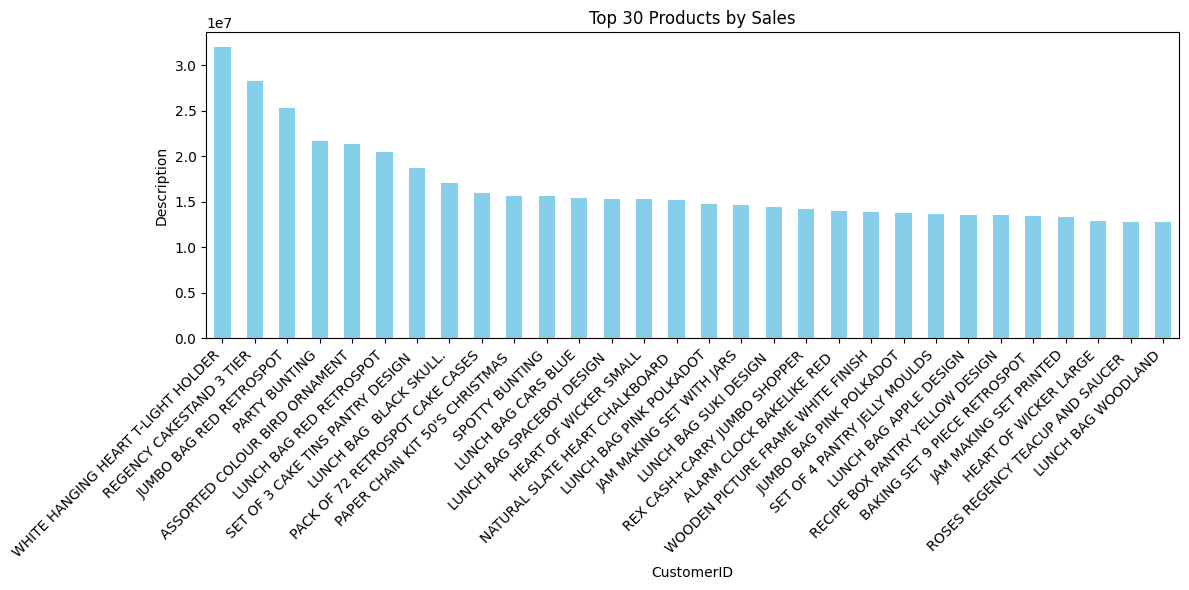

In [93]:
# Visualize 30 products using barchart
#Group by product and sum the sales
product_sales = df.groupby('Description')['CustomerID'].sum().nlargest(30)

# Create a bar chart
plt.figure(figsize=(12, 6))
product_sales.plot(kind='bar', color='skyblue')
plt.title('Top 30 Products by Sales')
plt.xlabel('CustomerID')
plt.ylabel('Description')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


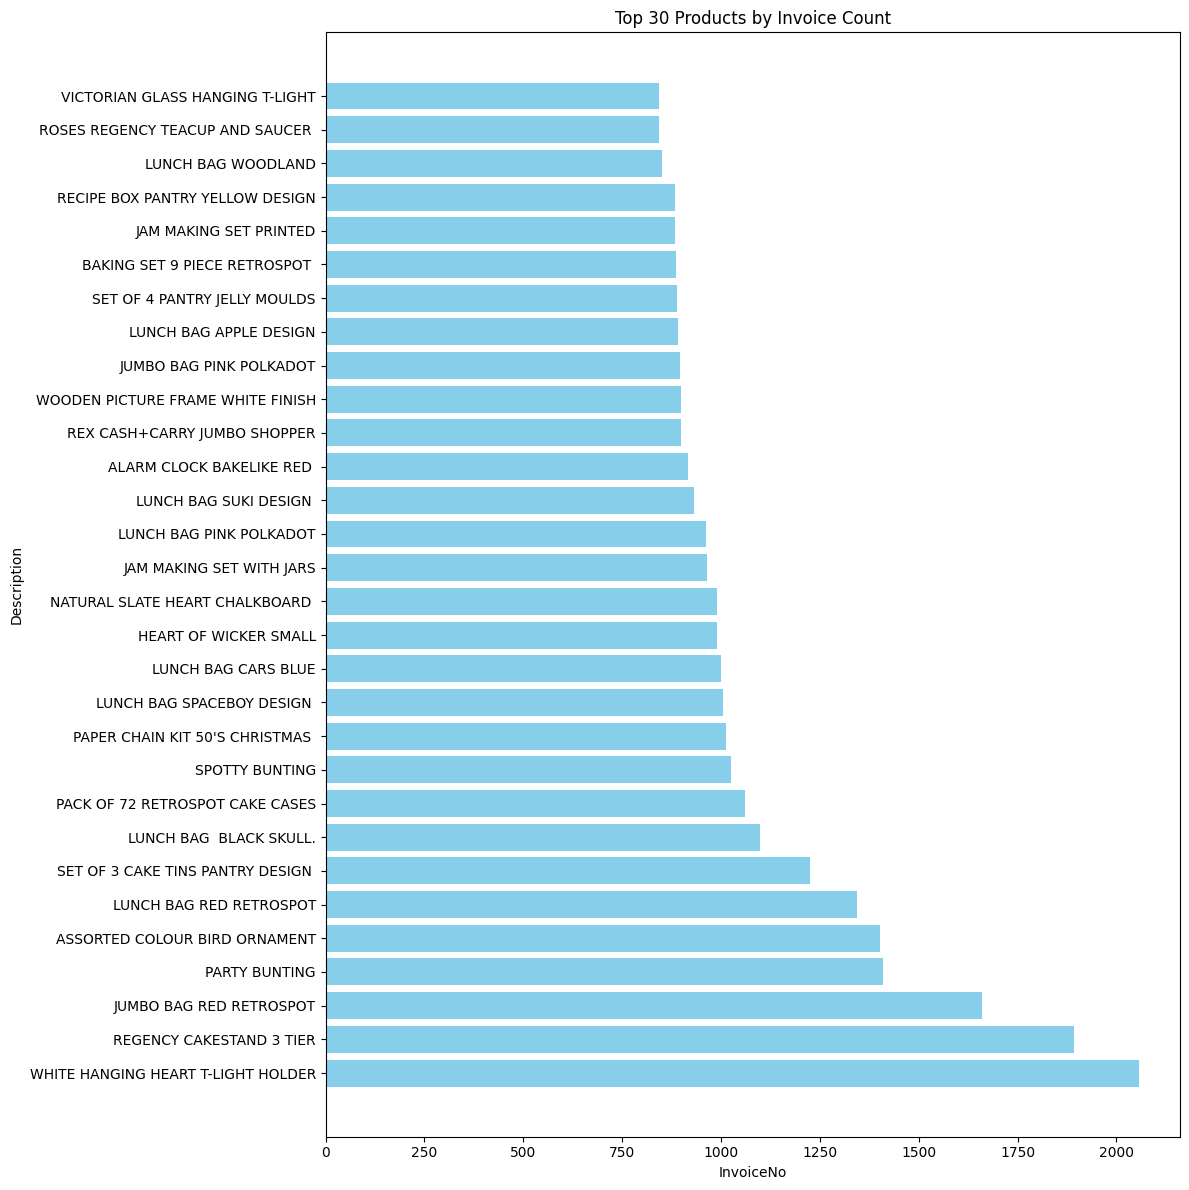

In [94]:
# Group by Product and Description, and count InvoiceId occurrences
product_invoice_counts = df.groupby(['Description'])['InvoiceNo'].count().reset_index()

# Sort and select the top 30 products based on the count of InvoiceId
top_products = product_invoice_counts.nlargest(30, 'InvoiceNo')

# Create a bar chart
plt.figure(figsize=(12,12 ))
plt.barh(top_products['Description'], top_products['InvoiceNo'], color='skyblue')
plt.title('Top 30 Products by Invoice Count')
plt.xlabel('InvoiceNo')
plt.ylabel('Description')
plt.tight_layout()
plt.show()
